In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


        
# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/credit-card-approval-prediction/credit_record.csv
/kaggle/input/credit-card-approval-prediction/application_record.csv
/kaggle/input/creditcardfraud/creditcard.csv


# Objective: What are we looking for in Credit card data?, What kind of data is in there and what can we make out of it?

A Credit Card Dataset for Machine Learning!

## Context
Credit score cards are a common risk control method in the financial industry. It uses personal information and data submitted by credit card applicants to predict the probability of future defaults and credit card borrowings. The bank is able to decide whether to issue a credit card to the applicant. Credit scores can objectively quantify the magnitude of risk.
 
Generally speaking, credit score cards are based on historical data. Once encountering large economic fluctuations. Past models may lose their original predictive power. Logistic model is a common method for credit scoring. Because Logistic is suitable for binary classification tasks and can calculate the coefficients of each feature. In order to facilitate understanding and operation, the score card will multiply the logistic regression coefficient by a certain value (such as 100) and round it.
 
At present, with the development of machine learning algorithms. More predictive methods such as Boosting, Random Forest, and Support Vector Machines have been introduced into credit card scoring. However, these methods often do not have good transparency. It may be difficult to provide customers and regulators with a reason for rejection or acceptance.

## Task
Build a machine learning model to predict if an applicant is 'good' or 'bad' client, different from other tasks, the definition of 'good' or 'bad' is not given. You should use some techique, such as vintage analysis to construct you label. Also, unbalance data problem is a big problem in this task.

## Content & Explanation
There're two tables could be merged by ID:



# Step 0: Knowing the data

### application_record.csv		

---
Feature name	Explanation	Remarks

---
- `ID`	                 Client number	
- `CODE_GENDER`	         Gender	
- `FLAG_OWN_CAR`	     Is there a car	
- `FLAG_OWN_REALTY`	     Is there a property	
- `CNT_CHILDREN`	     Number of children	
- `AMT_INCOME_TOTAL`	 Annual income	
- `NAME_INCOME_TYPE`	 Income category	
- `NAME_EDUCATION_TYPE`	 Education level	
- `NAME_FAMILY_STATUS`	 Marital status	
- `NAME_HOUSING_TYPE`	 Way of living	
- `DAYS_BIRTH`	         Birthday	Count backwards from current day (0), -1 means yesterday
- `DAYS_EMPLOYED`	     Start date of employment	Count backwards from current day(0). If positive, it means the person currently unemployed.
- `FLAG_MOBIL`	         Is there a mobile phone	
- `FLAG_WORK_PHONE`	     Is there a work phone	
- `FLAG_PHONE`	         Is there a phone	
- `FLAG_EMAIL`	         Is there an email	
- `OCCUPATION_TYPE`	     Occupation	
- `CNT_FAM_MEMBERS`	     Family size	

credit_record.csv		

---
Feature name	Explanation	Remarks

---
- `ID`	                Client number	
- `MONTHS_BALANCE`	    Record month	The month of the extracted data is the starting point, backwards, 0 is the current month, -1 is the previous month, and so on
- `STATUS`	            Status	0: 1-29 days past due 1: 30-59 days past due 2: 60-89 days overdue 3: 90-119 days overdue 4: 120-149 days overdue 5: Overdue or bad debts, write-offs for more than 150 days C: paid off that month X: No loan for the month

# Step 1: Load Credit Card Approval data files

In [3]:
# Application_record loads application details relating to applicant's general information, including income, occupation, education etc
# credit record is very specific bureau information maybe?, balance and status
application_record = pd.read_csv('/kaggle/input/credit-card-approval-prediction/application_record.csv')
credit_record = pd.read_csv('/kaggle/input/credit-card-approval-prediction/credit_record.csv')


# Step 2: Get basic information about the data. Investigate quickly what is given and what's not

In [24]:
application_record.shape

(438557, 18)

In [45]:
credit_record.shape # seems like NOT identical # of records in both and 

(1048575, 3)

## Checking if ID has all the same entries in both dataset

In [26]:
set(application_record['ID']) == set(credit_record['ID'])

False

## Get more information from the dataframes

In [27]:
application_record.head(2)

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0


In [46]:
credit_record.head(2)

,ID,MONTHS_BALANCE,STATUS
0,5001711,0,X
1,5001711,-1,0


In [47]:
credit_record.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 3 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   ID              1048575 non-null  int64 
 1   MONTHS_BALANCE  1048575 non-null  int64 
 2   STATUS          1048575 non-null  object
dtypes: int64(2), object(1)
memory usage: 24.0+ MB


## Change Month Balance to Record Month, which is what mentioned in the description

In [48]:
credit_record.rename(columns={'MONTHS_BALANCE':'RECORD_MONTH'}, inplace = True)


## Change entries to String, per the definition 

In [50]:
credit_record['RECORD_MONTH'] = credit_record['RECORD_MONTH'].apply(lambda x: "MONTH"+"_"+str(abs(x))) 

In [51]:
credit_record.head()

,ID,RECORD_MONTH,STATUS
0,5001711,MONTH_0,X
1,5001711,MONTH_1,0
2,5001711,MONTH_2,0
3,5001711,MONTH_3,0
4,5001712,MONTH_0,C


## From the merge validate parameter, we can see there may be duplicate entries for ID in applicant data. And, credit data also contains month by month data, so duplicate entries here as well. We need an approach to combine both data so as, for a particular client, we have data either for all current months, his deliquency..

In [34]:
#credit_application_data = pd.merge(application_record, credit_record, on = "ID", sort = True, indicator = True, validate = "many_to_many")
#credit_application_data.shape

(777715, 21)

## One such approach maybe: Aggregate all the credit data by ID. Agg. monthly data in columns than rows

In [56]:
aplcnt_deliq_matr_over_months_as_pvt=credit_record.pivot(index='ID', columns='RECORD_MONTH', values = 'STATUS')

In [57]:
type(aplcnt_deliq_matr_over_months_as_pvt)

pandas.core.frame.DataFrame

In [58]:
aplcnt_deliq_matr_over_months_as_pvt.columns, aplcnt_deliq_matr_over_months_as_pvt.index

(Index(['MONTH_0', 'MONTH_1', 'MONTH_10', 'MONTH_11', 'MONTH_12', 'MONTH_13',
        'MONTH_14', 'MONTH_15', 'MONTH_16', 'MONTH_17', 'MONTH_18', 'MONTH_19',
        'MONTH_2', 'MONTH_20', 'MONTH_21', 'MONTH_22', 'MONTH_23', 'MONTH_24',
        'MONTH_25', 'MONTH_26', 'MONTH_27', 'MONTH_28', 'MONTH_29', 'MONTH_3',
        'MONTH_30', 'MONTH_31', 'MONTH_32', 'MONTH_33', 'MONTH_34', 'MONTH_35',
        'MONTH_36', 'MONTH_37', 'MONTH_38', 'MONTH_39', 'MONTH_4', 'MONTH_40',
        'MONTH_41', 'MONTH_42', 'MONTH_43', 'MONTH_44', 'MONTH_45', 'MONTH_46',
        'MONTH_47', 'MONTH_48', 'MONTH_49', 'MONTH_5', 'MONTH_50', 'MONTH_51',
        'MONTH_52', 'MONTH_53', 'MONTH_54', 'MONTH_55', 'MONTH_56', 'MONTH_57',
        'MONTH_58', 'MONTH_59', 'MONTH_6', 'MONTH_60', 'MONTH_7', 'MONTH_8',
        'MONTH_9'],
       dtype='object', name='RECORD_MONTH'),
 Int64Index([5001711, 5001712, 5001713, 5001714, 5001715, 5001717, 5001718,
             5001719, 5001720, 5001723,
             ...
           

In [59]:
aplcnt_deliq_matr_over_months_as_pvt.head(2)

RECORD_MONTH,MONTH_0,MONTH_1,MONTH_10,MONTH_11,MONTH_12,MONTH_13,MONTH_14,MONTH_15,MONTH_16,MONTH_17,...,MONTH_55,MONTH_56,MONTH_57,MONTH_58,MONTH_59,MONTH_6,MONTH_60,MONTH_7,MONTH_8,MONTH_9
ID,,,,,,,,,,,,,,,,,,,,,
5001711,X,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5001712,C,C,0,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,C,NaN,C,C,0


## Now going back to applicant data 

In [60]:
application_record.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 438557 entries, 0 to 438556
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   438557 non-null  int64  
 1   CODE_GENDER          438557 non-null  object 
 2   FLAG_OWN_CAR         438557 non-null  object 
 3   FLAG_OWN_REALTY      438557 non-null  object 
 4   CNT_CHILDREN         438557 non-null  int64  
 5   AMT_INCOME_TOTAL     438557 non-null  float64
 6   NAME_INCOME_TYPE     438557 non-null  object 
 7   NAME_EDUCATION_TYPE  438557 non-null  object 
 8   NAME_FAMILY_STATUS   438557 non-null  object 
 9   NAME_HOUSING_TYPE    438557 non-null  object 
 10  DAYS_BIRTH           438557 non-null  int64  
 11  DAYS_EMPLOYED        438557 non-null  int64  
 12  FLAG_MOBIL           438557 non-null  int64  
 13  FLAG_WORK_PHONE      438557 non-null  int64  
 14  FLAG_PHONE           438557 non-null  int64  
 15  FLAG_EMAIL       

## Check Duplicates: seems like no duplicate records but check if we have duplicate client ID
 

In [65]:
application_record.duplicated().value_counts() 

False    438557
dtype: int64

### Yes, we have some duplicated client IDs, but what does it mean for a record?

In [66]:
application_record['ID'].duplicated().value_counts()  

False    438510
True         47
Name: ID, dtype: int64

### what are those IDS?

In [67]:
duplicate_ids = application_record['ID'][application_record['ID'].duplicated()]

In [69]:
len(duplicate_ids)

47

In [79]:
duplicate_ids.values

array([7602432, 7052783, 7838075, 7053557, 7023651, 7213374, 7089090,
       7576316, 7023108, 7137299, 7836711, 7022197, 7636389, 7207977,
       7045794, 7154819, 7836971, 7416167, 7702238, 7155150, 7317997,
       7036518, 7772847, 7243768, 7743418, 7090931, 7603224, 7833087,
       7742298, 7050948, 7174719, 7744386, 7052812, 7022327, 7154598,
       7046068, 7045885, 7636756, 7702516, 7099881, 7372589, 7024111,
       7282535, 7742853, 7135270, 7091721, 7618285])

### Chose one, say 421349, and check the duplicated records, what are they like?


In [78]:
(application_record['ID'] == 7052783).value_counts()

False    438555
True          2
Name: ID, dtype: int64

In [81]:
application_record[application_record['ID'].isin([7052783])]

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
421726,7052783,M,Y,Y,0,157500.0,Working,Higher education,Married,House / apartment,-13428,-2589,1,0,1,0,Laborers,2.0
422660,7052783,M,Y,Y,2,166500.0,Working,Secondary / secondary special,Married,House / apartment,-15883,-2697,1,1,0,1,Managers,4.0


In [94]:
7052783 in credit_record['ID'] # so we don't even have the credit data from this ID


False

## Lets see how many we have in common in application_record ID and credit_record ID


In [100]:
len(set(application_record['ID']).intersection(set(credit_record['ID'])))

36457

In [111]:
len(list(set(application_record['ID']) & set(credit_record['ID'])))

36457

# Step 3a: So we don't have much credit data for a lot of clients, the data is highly unbalanced. We will use EDA approach (Vintage Analysis) as mentioned here: https://www.kaggle.com/rikdifos/eda-vintage-analysis by the Xiao Song

What we need to do here?

- We don't have `Target` label so, we need to constuct labels. 
- We also have to work with Unbalanced data

## We can use `Vintage Analysis` to determine the Performance Window. It illustrates the behavior after an account was opened. Based on same origination period, it calculates charge-off ratio of a loan portfolio. Here comes our datasets, in which credit_record.csv contains loan accounts' credit records, the detailed data explanation is here:




In [112]:
# Some imports
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 100)

%matplotlib inline
%config InlineBackend.figure_format = 'svg'

### Algorithm:

    1. Define Record Month min, to find the starting month.
    2. Define Record month max, to find the end month.
    3. Define Window := end month - starting month
    4. Merge Credit data and PVT data:=
               - Select all from credit, pivot; Inner Join (left) on ID
    5. From this join data, delete users whose observe window < 20
    6. Define (Target: status) such that it is 1 when STATUS = {2, 3, 4, 5} else 0
    7. Define Months on Book as, "how many months after the open month now?, which  is Record Month - starting month
                
    

In [114]:
### Get Credit data
credit_record = pd.read_csv('/kaggle/input/credit-card-approval-prediction/credit_record.csv')


In [115]:
credit_record.head(2)

,ID,MONTHS_BALANCE,STATUS
0,5001711,0,X
1,5001711,-1,0


In [131]:
### convert credit data to wide format which every ID is a row

# 0.a
grouped = credit_record.groupby('ID') 

# 0.b
#pivot_tb = credit_record.pivot(index = 'ID', columns = 'MONTHS_BALANCE', values = 'STATUS') # reshape data as per the ID index and have data more columnar than row

# 1.
#pivot_tb['open_month'] = grouped['MONTHS_BALANCE'].min() # smallest value of MONTHS_BALANCE, is the month when loan was granted

# 2.
#pivot_tb['end_month'] = grouped['MONTHS_BALANCE'].max() # biggest value of MONTHS_BALANCE, might be observe over or canceling account
#pivot_tb['ID'] = pivot_tb.index
#pivot_tb = pivot_tb[['ID', 'open_month', 'end_month']]

# 3.
pivot_tb['window'] = pivot_tb['end_month'] - pivot_tb['open_month'] # calculate observe window
pivot_tb.reset_index(drop = True, inplace = True)

# 4.
credit = pd.merge(credit_record, pivot_tb, on = 'ID', how = 'left') # join calculated information


"\ncredit0 = credit.copy()\ncredit = credit[credit['window'] > 20] # delete users whose observe window less than 20\ncredit['status'] = np.where((credit['STATUS'] == '2') | (credit['STATUS'] == '3' )| (credit['STATUS'] == '4' )| (credit['STATUS'] == '5'), 1, 0) # analyze > 60 days past due \ncredit['status'] = credit['status'].astype(np.int8) # 1: overdue 0: not\ncredit['month_on_book'] = credit['MONTHS_BALANCE'] - credit['open_month'] # calculate month on book: how many months after opening account\ncredit.sort_values(by = ['ID','month_on_book'], inplace = True)\n"

In [133]:
credit['STATUS'].value_counts()


C    442031
0    383120
X    209230
1     11090
5      1693
2       868
3       320
4       223
Name: STATUS, dtype: int64

### As per the description of the data, we have:

- `0`: 1-29 days past due 
- `1`: 30-59 days past due 
- `2`: 60-89 days overdue 
- `3`: 90-119 days overdue 
- `4`: 120-149 days overdue 
- `5`: Overdue or bad debts, write-offs for more than 150 days 
- `C`: paid off that month 
- `X`: No loan for the month

So, We analyze and consider `Overdue`:= when debt is due for 60 days or more

### Define Target variable,  `status`

In [134]:
credit0 = credit.copy()

# 5.
credit = credit[credit['window'] > 20] # delete users whose observe window less than 20

# 6.
credit['status'] = np.where((credit['STATUS'] == '2') | (credit['STATUS'] == '3' )| (credit['STATUS'] == '4' )| (credit['STATUS'] == '5'), 1, 0) # analyze > 60 days past due 
credit['status'] = credit['status'].astype(np.int8) # 1: overdue 0: not

# 7.
credit['month_on_book'] = credit['MONTHS_BALANCE'] - credit['open_month'] # calculate month on book: how many months after opening account
credit.sort_values(by = ['ID','month_on_book'], inplace = True)


In [135]:
credit

,ID,MONTHS_BALANCE,STATUS,open_month,end_month,window,status,month_on_book
44,5001713,-21,X,-21,0,21,0,0
43,5001713,-20,X,-21,0,21,0,1
42,5001713,-19,X,-21,0,21,0,2
41,5001713,-18,X,-21,0,21,0,3
40,5001713,-17,X,-21,0,21,0,4
...,...,...,...,...,...,...,...,...
1048549,5150487,-4,C,-29,0,29,0,25
1048548,5150487,-3,C,-29,0,29,0,26
1048547,5150487,-2,C,-29,0,29,0,27
1048546,5150487,-1,C,-29,0,29,0,28


### We will calculate: for a particular open month and month on book, how many credit cards issue (due)/ how many total accounts (sta_sum)

In [136]:
##### denominator
denominator = pivot_tb.groupby(['open_month']).agg({'ID': ['count']}) # count how many users in every month the account was opened
denominator.reset_index(inplace = True)
denominator.columns = ['open_month','sta_sum']
denominator


,open_month,sta_sum
0,-60,415
1,-59,406
2,-58,440
3,-57,400
4,-56,470
5,-55,486
6,-54,468
7,-53,493
8,-52,553
9,-51,582


In [137]:
##### ventage table
vintage = credit.groupby(['open_month','month_on_book']).agg({'ID': ['count']}) 
vintage.reset_index(inplace = True)
vintage.columns = ['open_month','month_on_book','sta_sum'] 
vintage['due_count'] = np.nan
vintage = vintage[['open_month','month_on_book','due_count']] # delete aggerate column
vintage = pd.merge(vintage, denominator, on = ['open_month'], how = 'left') # join sta_sum colun to vintage table
vintage

,open_month,month_on_book,due_count,sta_sum
0,-60,0,NaN,415
1,-60,1,NaN,415
2,-60,2,NaN,415
3,-60,3,NaN,415
4,-60,4,NaN,415
...,...,...,...,...
1655,-21,17,NaN,858
1656,-21,18,NaN,858
1657,-21,19,NaN,858
1658,-21,20,NaN,858


### This is where we define due:= for a particular open month and month on book, list of ID records with credit status == 1 and take set of those

In [138]:
for j in range(-60,1): # outer loop: month in which account was opened
    ls = []
    for i in range(0,61): # inner loop time after the credit card was granted
        due = list(credit[(credit['status'] == 1) & (credit['month_on_book'] == i) & (credit['open_month'] == j)]['ID']) # get ID which satisfy the condition
        ls.extend(due) # As time goes, add bad customers
        vintage.loc[(vintage['month_on_book'] == i) & (vintage['open_month'] == j), 'due_count'] = len(set(ls)) # calculate non-duplicate ID numbers using set()
        
vintage['sta_rate']  = vintage['due_count'] / vintage['sta_sum'] # calculate cumulative % of bad customers
vintage       

,open_month,month_on_book,due_count,sta_sum,sta_rate
0,-60,0,0.0,415,0.000000
1,-60,1,0.0,415,0.000000
2,-60,2,0.0,415,0.000000
3,-60,3,0.0,415,0.000000
4,-60,4,0.0,415,0.000000
...,...,...,...,...,...
1655,-21,17,15.0,858,0.017483
1656,-21,18,15.0,858,0.017483
1657,-21,19,15.0,858,0.017483
1658,-21,20,15.0,858,0.017483


### Convert Long to Wide data

In [139]:
### Vintage wide table
vintage_wide = vintage.pivot(index = 'open_month',
                             columns = 'month_on_book',
                             values = 'sta_rate')
vintage_wide

month_on_book,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60
open_month,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
-60,0.00000,0.000000,0.000000,0.000000,0.000000,0.002410,0.002410,0.007229,0.007229,0.009639,0.009639,0.012048,0.014458,0.016867,0.016867,0.016867,0.016867,0.016867,0.016867,0.016867,0.016867,0.019277,0.019277,0.019277,0.019277,0.021687,0.021687,0.021687,0.021687,0.024096,0.026506,0.026506,0.026506,0.026506,0.026506,0.026506,0.026506,0.026506,0.026506,0.026506,0.026506,0.026506,0.026506,0.026506,0.026506,0.026506,0.026506,0.026506,0.026506,0.026506,0.028916,0.028916,0.028916,0.028916,0.028916,0.028916,0.028916,0.028916,0.031325,0.031325,0.031325
-59,0.00000,0.000000,0.000000,0.004926,0.004926,0.004926,0.007389,0.007389,0.007389,0.012315,0.012315,0.019704,0.019704,0.019704,0.019704,0.019704,0.019704,0.019704,0.022167,0.024631,0.024631,0.027094,0.027094,0.027094,0.027094,0.029557,0.029557,0.029557,0.029557,0.029557,0.029557,0.029557,0.029557,0.029557,0.029557,0.029557,0.029557,0.029557,0.029557,0.029557,0.029557,0.029557,0.029557,0.029557,0.029557,0.029557,0.029557,0.029557,0.029557,0.029557,0.029557,0.029557,0.029557,0.029557,0.032020,0.032020,0.032020,0.032020,0.032020,0.032020,NaN
-58,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.004545,0.006818,0.006818,0.011364,0.013636,0.013636,0.013636,0.013636,0.013636,0.013636,0.015909,0.018182,0.018182,0.018182,0.022727,0.022727,0.022727,0.022727,0.022727,0.022727,0.022727,0.022727,0.022727,0.022727,0.022727,0.022727,0.022727,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,NaN,NaN
-57,0.00000,0.000000,0.000000,0.000000,0.002500,0.002500,0.002500,0.007500,0.007500,0.007500,0.007500,0.007500,0.010000,0.017500,0.017500,0.017500,0.017500,0.017500,0.017500,0.017500,0.017500,0.017500,0.017500,0.017500,0.020000,0.020000,0.020000,0.020000,0.020000,0.020000,0.020000,0.020000,0.020000,0.020000,0.020000,0.022500,0.022500,0.022500,0.022500,0.022500,0.022500,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,NaN,NaN,NaN
-56,0.00000,0.000000,0.004255,0.004255,0.008511,0.010638,0.010638,0.017021,0.017021,0.021277,0.021277,0.025532,0.029787,0.034043,0.034043,0.034043,0.034043,0.034043,0.034043,0.034043,0.034043,0.034043,0.034043,0.034043,0.034043,0.034043,0.034043,0.034043,0.034043,0.034043,0.034043,0.034043,0.034043,0.034043,0.034043,0.034043,0.034043,0.034043,0.034043,0.034043,0.034043,0.034043,0.034043,0.034043,0.034043,0.034043,0.034043,0.034043,0.034043,0.034043,0.034043,0.036170,0.036170,0.036170,0.036170,0.038298,0.038298,NaN,NaN,NaN,NaN
-55,0.00000,0.000000,0.002058,0.006173,0.012346,0.016461,0.022634,0.022634,0.022634,0.024691,0.024691,0.024691,0.026749,0.032922,0.034979,0.037037,0.039095,0.039095,0.039095,0.039095,0.039095,0.039095,0.039095,0.039095,0.039095,0.039095,0.041152,0.041152,0.041152,0.041152,0.041152,0.041152,0.041152,0.043210,0.043210,0.043210,0.043210,0.043210,0.043210,0.045267,0.045267,0.045267,0.045267,0.045267,0.045267,0.045267,0.045267,0.045267,0.045267,0.045267,0.045267,0.045267,0.045267,0.045267,0.045267,0.045267,NaN,NaN,NaN,NaN,NaN
-54,0.00000,0.000000,0.000000,0.002137,0.004274,0.004274,0.006410,0.012821,0.012821,0.017094,0.019231,0.019231,0.023504,0.027778,0.027778,0.029915,0.029915,0.032051,0.032051,0.032051,0.032051,0.032051,0.032051,0.032051,0.032051,0.032051,0.032051,0.032051,0.032051,0.032051,0.032051,0.032051,0.032051,0.032051,0.032051,0.032051,0.032051,0.032051,0.032051,0.032051,0.032051,0.032051,0.032051,0.032051,0.032051,0.032051,0.032051,0.032051,0.032051,0.032051,0.032051,0.032051,0.032051,0.032051,0.032051,NaN,Na

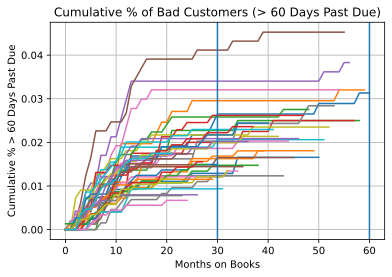

In [143]:
# plot vintage line chart
vintage0 = vintage_wide.replace(0,np.nan)
lst = [i for i in range(0,61)]
vintage_wide[lst].T.plot(legend = False, grid = True, title = 'Cumulative % of Bad Customers (> 60 Days Past Due)')
plt.axvline(30)
plt.axvline(60)
#plt.axvline(90)
plt.xlabel('Months on Books')
plt.ylabel('Cumulative % > 60 Days Past Due')
plt.show()

##  Now we will cover the Observe window analysis,

If observe window is too short, users' behavior will not fully show off, which will bring unnecessary noise to our data.

In order to observe how many accounts increase as observe window extend, we plot thi

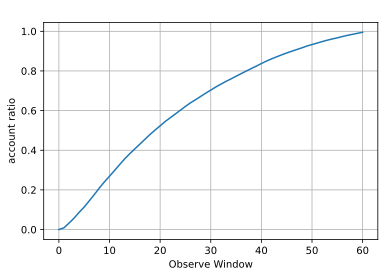

In [144]:
lst = []
for i in range(0,61):
    ratio = len(pivot_tb[pivot_tb['window'] < i]) / len(set(pivot_tb['ID']))
    lst.append(ratio)
    
pd.Series(lst).plot(legend = False, grid = True, title = ' ')
plt.xlabel('Observe Window')
plt.ylabel('account ratio')
plt.show()

We could see that a 60 months observe window covers all appliers, while 20 months window contains about 52% records.

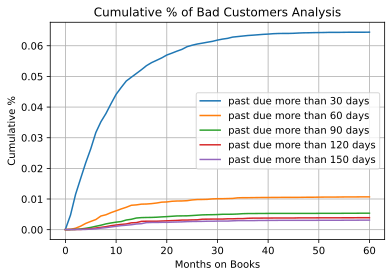

In [146]:
def calculate_observe(credit, command):
    '''calculate observe window
    '''
    id_sum = len(set(pivot_tb['ID']))
    credit['status'] = 0
    exec(command)
    #credit.loc[(credit['STATUS'] == '4' )| (credit['STATUS'] == '5'), 'status'] = 1
    credit['month_on_book'] = credit['MONTHS_BALANCE'] - credit['open_month']
    minagg = credit[credit['status'] == 1].groupby('ID')['month_on_book'].min()
    minagg = pd.DataFrame(minagg)
    minagg['ID'] = minagg.index
    obslst = pd.DataFrame({'month_on_book':range(0,61), 'rate': None})
    lst = []
    for i in range(0,61):
        due = list(minagg[minagg['month_on_book']  == i]['ID'])
        lst.extend(due)
        obslst.loc[obslst['month_on_book'] == i, 'rate'] = len(set(lst)) / id_sum 
    return obslst['rate']

command = "credit.loc[(credit['STATUS'] == '0') | (credit['STATUS'] == '1') | (credit['STATUS'] == '2') | (credit['STATUS'] == '3' )| (credit['STATUS'] == '4' )| (credit['STATUS'] == '5'), 'status'] = 1"   
morethan1 = calculate_observe(credit, command)
command = "credit.loc[(credit['STATUS'] == '1') | (credit['STATUS'] == '2') | (credit['STATUS'] == '3' )| (credit['STATUS'] == '4' )| (credit['STATUS'] == '5'), 'status'] = 1"   
morethan30 = calculate_observe(credit, command)
command = "credit.loc[(credit['STATUS'] == '2') | (credit['STATUS'] == '3' )| (credit['STATUS'] == '4' )| (credit['STATUS'] == '5'), 'status'] = 1"
morethan60 = calculate_observe(credit, command)
command = "credit.loc[(credit['STATUS'] == '3' )| (credit['STATUS'] == '4' )| (credit['STATUS'] == '5'), 'status'] = 1"
morethan90 = calculate_observe(credit, command)
command = "credit.loc[(credit['STATUS'] == '4' )| (credit['STATUS'] == '5'), 'status'] = 1"
morethan120 = calculate_observe(credit, command)
command = "credit.loc[(credit['STATUS'] == '5'), 'status'] = 1"
morethan150 = calculate_observe(credit, command)

obslst = pd.DataFrame({'past due more than 30 days': morethan30,
                       'past due more than 60 days': morethan60,
                       'past due more than 90 days': morethan90,
                       'past due more than 120 days': morethan120,
                       'past due more than 150 days': morethan150
                        })
obslst.plot(grid = True, title = 'Cumulative % of Bad Customers Analysis')
plt.xlabel('Months on Books')
plt.ylabel('Cumulative %')
plt.show()

### This plot could be seen as a average (across open-month) version of vintage plot. For longer past due date, it needs longer observe window. For example, more than 150 days past due needs at least 5 months until first bad customer appears. For most situation, a 20-months observe window could cover most bad customer. However, For 30 days past due, we could see that after 30 months on books, there still are new bad customer join in the list. So a 20 MOB observe window will be appropriate. Those who exists shorter than the observe window should be excluded from our analysis, thus you could see I deleted users whose observe window less than 20 on last section (the window could be changed).

## Overall Past-due Ratio
Calculating overall past-due rate. Respectively, we analyze 1 day past due, 20 days past due, 60 days past due, 90 days past due, 120 days past due, 150 days past due. This analysis could help us to define who are bad customers. We could see that almost 87% users have past due more than 1 day, which is too common, thus it's inappropriate to be a standard. What about 150 days overdue? Only 0.4% of accounts appear to past due that long. If we use that, we will left many bad customers in our scrutiny. A table like that will help you to determine what will be the most suitable standard of bad customers

In [147]:
def calculate_rate(pivot_tb, command): 
    '''calculate bad customer rate
    '''
    credit0['status'] = None
    exec(command) # excuate input code
    sumagg = credit0.groupby('ID')['status'].agg(sum)
    pivot_tb = pd.merge(pivot_tb, sumagg, on = 'ID', how = 'left')
    pivot_tb.loc[pivot_tb['status'] > 1, 'status'] = 1
    rate = pivot_tb['status'].sum() / len(pivot_tb)
    return round(rate, 5)

command = "credit0.loc[(credit0['STATUS'] == '0') | (credit0['STATUS'] == '1') | (credit0['STATUS'] == '2') | (credit0['STATUS'] == '3' )| (credit0['STATUS'] == '4' )| (credit0['STATUS'] == '5'), 'status'] = 1"   
morethan1 = calculate_rate(pivot_tb, command)
command = "credit0.loc[(credit0['STATUS'] == '1') | (credit0['STATUS'] == '2') | (credit0['STATUS'] == '3' )| (credit0['STATUS'] == '4' )| (credit0['STATUS'] == '5'), 'status'] = 1"   
morethan30 = calculate_rate(pivot_tb, command)
command = "credit0.loc[(credit0['STATUS'] == '2') | (credit0['STATUS'] == '3' )| (credit0['STATUS'] == '4' )| (credit0['STATUS'] == '5'), 'status'] = 1"
morethan60 = calculate_rate(pivot_tb, command)
command = "credit0.loc[(credit0['STATUS'] == '3' )| (credit0['STATUS'] == '4' )| (credit0['STATUS'] == '5'), 'status'] = 1"
morethan90 = calculate_rate(pivot_tb, command)
command = "credit0.loc[(credit0['STATUS'] == '4' )| (credit0['STATUS'] == '5'), 'status'] = 1"
morethan120 = calculate_rate(pivot_tb, command)
command = "credit0.loc[(credit0['STATUS'] == '5'), 'status'] = 1"
morethan150 = calculate_rate(pivot_tb, command)

summary_dt = pd.DataFrame({'situation':['past due more than 1 day',
                               'past due more than 30 days',
                               'past due more than 60 days',
                               'past due more than 90 days',
                               'past due more than 120 days',
                               'past due more than 150 days'],
                      'bad customer ratio':[morethan1,
                               morethan30,
                               morethan60,
                               morethan90, 
                               morethan120,
                               morethan150, 
                      ]})
summary_dt

,situation,bad customer ratio
0,past due more than 1 day,0.87054
1,past due more than 30 days,0.11634
2,past due more than 60 days,0.01450
3,past due more than 90 days,0.00720
4,past due more than 120 days,0.00528
5,past due more than 150 days,0.00424


# Step 3b: Feature Engineering

## find all users' account open month.

In [4]:
begin_month=pd.DataFrame(credit_record.groupby(["ID"])["MONTHS_BALANCE"].agg(min))
begin_month=begin_month.rename(columns={'MONTHS_BALANCE':'begin_month'}) 
new_data=pd.merge(application_record,begin_month,how="left",on="ID") #merge to record data

In [9]:
len(new_data) - new_data['begin_month'].isnull().sum()

36457

In [6]:
begin_month.head()

,begin_month
ID,
5001711,-3
5001712,-18
5001713,-21
5001714,-14
5001715,-59


## choose users who overdue for more than 60 days as target risk users. Those samples are marked as '1', else are '0'.

In [10]:
credit_record['dep_value'] = None
credit_record['dep_value'][credit_record['STATUS'] =='2']='Yes' 
credit_record['dep_value'][credit_record['STATUS'] =='3']='Yes' 
credit_record['dep_value'][credit_record['STATUS'] =='4']='Yes' 
credit_record['dep_value'][credit_record['STATUS'] =='5']='Yes'

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from 

In [12]:
credit_record.dep_value.value_counts()

Yes    3104
Name: dep_value, dtype: int64

In [17]:
#cpunt=credit_record.groupby('ID').count()
#cpunt['dep_value'][cpunt['dep_value'] > 0]='Yes' 
#cpunt['dep_value'][cpunt['dep_value'] == 0]='No' 
#cpunt = cpunt[['dep_value']]
new_data=pd.merge(new_data,cpunt,how='inner',on='ID')
new_data['target']=new_data['dep_value']
new_data.loc[new_data['target']=='Yes','target']=1
new_data.loc[new_data['target']=='No','target']=0
new_data

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,...,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,begin_month,dep_value,target
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,...,-4542,1,1,0,0,NaN,2.0,-15.0,No,0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,...,-4542,1,1,0,0,NaN,2.0,-14.0,No,0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,...,-1134,1,0,0,0,Security staff,2.0,-29.0,No,0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,...,-3051,1,0,1,1,Sales staff,1.0,-4.0,No,0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,...,-3051,1,0,1,1,Sales staff,1.0,-26.0,No,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36452,5149828,M,Y,Y,0,315000.0,Working,Secondary / secondary special,Married,House / apartment,...,-2420,1,0,0,0,Managers,2.0,-11.0,Yes,1
36453,5149834,F,N,Y,0,157500.0,Commercial associate,Higher education,Married,House / apartment,...,-1325,1,0,1,1,Medicine staff,2.0,-23.0,Yes,1
36454,5149838,F,N,Y,0,157500.0,Pensioner,Higher education,Married,House / apartment,...,-1325,1,0,1,1,Medicine staff,2.0,-32.0,Yes,1
36455,5150049,F,N,Y,0,283500.0,Working,Secondary / secondary special,Married,House / apartment,...,-655,1,0,0,0,Sales staff,2.0,-9.0,Yes,1


In [18]:
print(cpunt['dep_value'].value_counts())
cpunt['dep_value'].value_counts(normalize=True)

No     45318
Yes      667
Name: dep_value, dtype: int64


No     0.985495
Yes    0.014505
Name: dep_value, dtype: float64

## Renaming features for better interpretation

In [19]:
new_data.rename(columns={'CODE_GENDER':'Gender','FLAG_OWN_CAR':'Car','FLAG_OWN_REALTY':'Reality',
                         'CNT_CHILDREN':'ChldNo','AMT_INCOME_TOTAL':'inc',
                         'NAME_EDUCATION_TYPE':'edutp','NAME_FAMILY_STATUS':'famtp',
                        'NAME_HOUSING_TYPE':'houtp','FLAG_EMAIL':'email',
                         'NAME_INCOME_TYPE':'inctp','FLAG_WORK_PHONE':'wkphone',
                         'FLAG_PHONE':'phone','CNT_FAM_MEMBERS':'famsize',
                        'OCCUPATION_TYPE':'occyp'
                        },inplace=True)
new_data.head()

,ID,Gender,Car,Reality,ChldNo,inc,inctp,edutp,famtp,houtp,...,DAYS_EMPLOYED,FLAG_MOBIL,wkphone,phone,email,occyp,famsize,begin_month,dep_value,target
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,...,-4542,1,1,0,0,NaN,2.0,-15.0,No,0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,...,-4542,1,1,0,0,NaN,2.0,-14.0,No,0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,...,-1134,1,0,0,0,Security staff,2.0,-29.0,No,0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,...,-3051,1,0,1,1,Sales staff,1.0,-4.0,No,0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,...,-3051,1,0,1,1,Sales staff,1.0,-26.0,No,0


## Missing values

In [21]:
new_data.isnull().sum()

ID                   0
Gender               0
Car                  0
Reality              0
ChldNo               0
inc                  0
inctp                0
edutp                0
famtp                0
houtp                0
DAYS_BIRTH           0
DAYS_EMPLOYED        0
FLAG_MOBIL           0
wkphone              0
phone                0
email                0
occyp            11323
famsize              0
begin_month          0
dep_value            0
target               0
dtype: int64

In [25]:
new_data.isna().sum()

ID                   0
Gender               0
Car                  0
Reality              0
ChldNo               0
inc                  0
inctp                0
edutp                0
famtp                0
houtp                0
DAYS_BIRTH           0
DAYS_EMPLOYED        0
FLAG_MOBIL           0
wkphone              0
phone                0
email                0
occyp            11323
famsize              0
begin_month          0
dep_value            0
target               0
dtype: int64

In [26]:
new_data.dropna()

,ID,Gender,Car,Reality,ChldNo,inc,inctp,edutp,famtp,houtp,...,DAYS_EMPLOYED,FLAG_MOBIL,wkphone,phone,email,occyp,famsize,begin_month,dep_value,target
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,...,-1134,1,0,0,0,Security staff,2.0,-29.0,No,0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,...,-3051,1,0,1,1,Sales staff,1.0,-4.0,No,0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,...,-3051,1,0,1,1,Sales staff,1.0,-26.0,No,0
5,5008810,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,...,-3051,1,0,1,1,Sales staff,1.0,-26.0,No,0
6,5008811,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,...,-3051,1,0,1,1,Sales staff,1.0,-38.0,No,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36452,5149828,M,Y,Y,0,315000.0,Working,Secondary / secondary special,Married,House / apartment,...,-2420,1,0,0,0,Managers,2.0,-11.0,Yes,1
36453,5149834,F,N,Y,0,157500.0,Commercial associate,Higher education,Married,House / apartment,...,-1325,1,0,1,1,Medicine staff,2.0,-23.0,Yes,1
36454,5149838,F,N,Y,0,157500.0,Pensioner,Higher education,Married,House / apartment,...,-1325,1,0,1,1,Medicine staff,2.0,-32.0,Yes,1
36455,5150049,F,N,Y,0,283500.0,Working,Secondary / secondary special,Married,House / apartment,...,-655,1,0,0,0,Sales staff,2.0,-9.0,Yes,1


In [27]:
new_data.shape

(36457, 21)

In [44]:
new_data_wo_missing_vals = new_data.mask(new_data == 'NULL').dropna()

In [45]:
new_data_wo_missing_vals

,ID,Gender,Car,Reality,ChldNo,inc,inctp,edutp,famtp,houtp,...,DAYS_EMPLOYED,FLAG_MOBIL,wkphone,phone,email,occyp,famsize,begin_month,dep_value,target
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,...,-1134,1,0,0,0,Security staff,2.0,-29.0,No,0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,...,-3051,1,0,1,1,Sales staff,1.0,-4.0,No,0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,...,-3051,1,0,1,1,Sales staff,1.0,-26.0,No,0
5,5008810,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,...,-3051,1,0,1,1,Sales staff,1.0,-26.0,No,0
6,5008811,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,...,-3051,1,0,1,1,Sales staff,1.0,-38.0,No,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36452,5149828,M,Y,Y,0,315000.0,Working,Secondary / secondary special,Married,House / apartment,...,-2420,1,0,0,0,Managers,2.0,-11.0,Yes,1
36453,5149834,F,N,Y,0,157500.0,Commercial associate,Higher education,Married,House / apartment,...,-1325,1,0,1,1,Medicine staff,2.0,-23.0,Yes,1
36454,5149838,F,N,Y,0,157500.0,Pensioner,Higher education,Married,House / apartment,...,-1325,1,0,1,1,Medicine staff,2.0,-32.0,Yes,1
36455,5150049,F,N,Y,0,283500.0,Working,Secondary / secondary special,Married,House / apartment,...,-655,1,0,0,0,Sales staff,2.0,-9.0,Yes,1


## Information Value df initialize

In [46]:
ivtable=pd.DataFrame(new_data_wo_missing_vals.columns,columns=['variable'])
ivtable['IV']=None
namelist = ['FLAG_MOBIL','begin_month','dep_value','target','ID']

for i in namelist:
    ivtable.drop(ivtable[ivtable['variable'] == i].index, inplace=True)

ivtable

,variable,IV
1,Gender,None
2,Car,None
3,Reality,None
4,ChldNo,None
5,inc,None
6,inctp,None
7,edutp,None
8,famtp,None
9,houtp,None
10,DAYS_BIRTH,None


## Utility functions for calculation IV, converting columns to dummy etc.

In [31]:
def calc_iv(df, feature, target, pr=False):
    lst = []
    
    # 1. Take the column vector of that feature, fill any 'NULL' values
    df[feature] = df[feature].fillna("NULL") 
    
    # 2. Run through all the unique values of the features
    for i in range(df[feature].nunique()):
        val = list(df[feature].unique())[i] # get the i value from the unique feature list
        
        # 3. Create a list that includes, Feature, Val, count of val (all), count of target (GOOD), count of target (BAD)
        lst.append([feature,                                                        # Variable
                    val,                                                            # Value
                    df[df[feature] == val].count()[feature],                        # All
                    df[(df[feature] == val) & (df[target] == 0)].count()[feature],  # Good (think: Fraud == 0)
                    df[(df[feature] == val) & (df[target] == 1)].count()[feature]]) # Bad (think: Fraud == 1)
    
    print('lst for {} is: {}'.format(feature, lst))
    
    # 4. Converting lst to dataframe
    data = pd.DataFrame(lst, columns=['Variable', 'Value', 'All', 'Good', 'Bad'])
    
    # 5. Define Share:= count val (all) of feature/ count of all for features
    data['Share'] = data['All'] / data['All'].sum()
    
    # 6. Define Bad:= Bad/count val (all) of feature
    data['Bad Rate'] = data['Bad'] / data['All']
    
    # 7. Good and Bad distribution as proportion
    data['Distribution Good'] = (data['All'] - data['Bad']) / (data['All'].sum() - data['Bad'].sum())
    data['Distribution Bad'] = data['Bad'] / data['Bad'].sum()
    
    # 8. WOE:= log (Good Proportion/Bad Proportion)
    data['WoE'] = np.log(data['Distribution Good'] / data['Distribution Bad'])
    
    # 9. Dealing with Edgecases
    data = data.replace({'WoE': {np.inf: 0, -np.inf: 0}})
    
    # 10. Define IV:= WOE *(Good Proportion - Bad Proportion)
    data['IV'] = data['WoE'] * (data['Distribution Good'] - data['Distribution Bad'])

    data = data.sort_values(by=['Variable', 'Value'], ascending=[True, True])
    data.index = range(len(data.index))

    if pr:
        print(data)
        print('IV = ', data['IV'].sum())

    iv = data['IV'].sum()
    print('This variable\'s IV is:',iv)
    print(df[feature].value_counts())
    return iv, data


In [32]:
def convert_dummy(df, feature,rank=0):
    
    # 1. get dummy variable for the feature in df
    pos = pd.get_dummies(df[feature], prefix=feature)
    
    # 2. Feature label with highest freq
    mode = df[feature].value_counts().index[rank]
    
    # 3. define biggest feature label as  column name
    biggest = feature + '_' + str(mode)
    
    # 4. drop biggest from dummies
    pos.drop([biggest],axis=1,inplace=True)
    
    # 5. drop features itself from dataframe df to remove redundant info
    df.drop([feature],axis=1,inplace=True)
    
    # 6. Join again for completeness
    df=df.join(pos)
    return df

In [33]:
def get_category(df, col, binsnum, labels, qcut = False):
    
    # 1. cut the datafame col based on quantile or equal length bins
    if qcut:
        localdf = pd.qcut(df[col], q = binsnum, labels = labels) # quantile cut
    else:
        localdf = pd.cut(df[col], bins = binsnum, labels = labels) # equal-length cut
        
    # 2. Create dataframe from numpy arrays
    localdf = pd.DataFrame(localdf)
    
    # 3. name the col
    name = 'gp' + '_' + col
    localdf[name] = localdf[col]
    
    # 4. Join to the orig. dataframe, and mark as category by casting to astype(object)
    df = df.join(localdf[name])
    df[name] = df[name].astype(object)
    return df

In [35]:
import matplotlib.pyplot as plt

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    
    # 1. Normalize confusion matrix if provided as True in the inputs
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        
    print(cm.sum(axis=1))    
    #print(cm)
    print(cm.sum(axis=1)[:, np.newaxis])
    
    # 2. plot cm as image

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    
    # 3. assign tick marks
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes)
    plt.yticks(tick_marks, classes)
    
    # 4. Assign number format

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    
    
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

## Column by Column IV table

### 1. Gender

In [55]:
new_data_wo_missing_vals.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25134 entries, 2 to 36456
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             25134 non-null  int64  
 1   Gender         25134 non-null  object 
 2   Car            25134 non-null  object 
 3   Reality        25134 non-null  object 
 4   ChldNo         25134 non-null  int64  
 5   inc            25134 non-null  float64
 6   inctp          25134 non-null  object 
 7   edutp          25134 non-null  object 
 8   famtp          25134 non-null  object 
 9   houtp          25134 non-null  object 
 10  DAYS_BIRTH     25134 non-null  int64  
 11  DAYS_EMPLOYED  25134 non-null  int64  
 12  FLAG_MOBIL     25134 non-null  int64  
 13  wkphone        25134 non-null  int64  
 14  phone          25134 non-null  int64  
 15  email          25134 non-null  int64  
 16  occyp          25134 non-null  object 
 17  famsize        25134 non-null  float64
 18  begin_

In [73]:
#1. Replace strings by numerics
new_data_wo_missing_vals['Gender'] = new_data_wo_missing_vals['Gender'].replace(['F','M'],[0,1])

#print(new_data_wo_missing_vals['Gender'].value_counts())

# 2, Calculate IV using the above function
iv, data = calc_iv(new_data_wo_missing_vals,'Gender','target')

#3 Update the entries in the ivtable for Gender
ivtable.loc[ivtable['variable']=='Gender','IV']=iv
data.head()

lst for Gender is: [['Gender', 1, 9504, 9312, 192], ['Gender', 0, 15630, 15400, 230]]
This variable's IV is: 0.02520350452745081
0    15630
1     9504
Name: Gender, dtype: int64


,Variable,Value,All,Good,Bad,Share,Bad Rate,Distribution Good,Distribution Bad,WoE,IV
0,Gender,0,15630,15400,230,0.621867,0.014715,0.623179,0.545024,0.134005,0.010473
1,Gender,1,9504,9312,192,0.378133,0.020202,0.376821,0.454976,-0.188475,0.014730


In [53]:
from pandas.api.types import is_string_dtype
from pandas.api.types import is_numeric_dtype

def col_by_col_IV_gen(df, col, target, ivtable, mapping_dict):
    
    # 1. convert labels to numeric by replace function
    df_cpy = df.copy()
    vals = df_cpy[col].unique() # values in the original column
    print(df_cpy[col].dtype.name)
    
    if (not(is_numeric_dtype(df[col])) & is_string_dtype(df[col])):
        df_cpy[col] = df_cpy[col].replace(mapping_dict)
    
    # 2, Calculate IV using the above function
    iv, data = calc_iv(df_cpy,col,target)
    
    #3 Update the entries in the ivtable for Gender 
    ivtable.loc[ivtable['variable']== col,'IV']=iv
    
    print(data.head()) 
    
    return df_cpy
    

In [69]:
values_iv_df = new_data_wo_missing_vals[list(ivtable.variable)]
dict(zip([x for x in values_iv_df], [values_iv_df[x].unique() for x in values_iv_df]))

{'Gender': array(['M', 'F'], dtype=object),
 'Car': array(['Y', 'N'], dtype=object),
 'Reality': array(['Y', 'N'], dtype=object),
 'ChldNo': array([ 0,  3,  1,  2,  4, 14,  5, 19,  7]),
 'inc': array([ 112500. ,  270000. ,  135000. ,  130500. ,  157500. ,  405000. ,
         211500. ,  360000. ,  126000. ,  247500. ,  297000. ,  166500. ,
         225000. ,  315000. ,  148500. ,  202500. ,  450000. ,  180000. ,
          90000. ,  765000. ,  229500. ,  292500. ,   74250. ,  144000. ,
         337500. ,  193500. ,  267750. ,  139500. ,   67500. ,  252000. ,
         900000. ,  279000. ,   76500. ,  234000. ,   81000. ,  108000. ,
         198000. ,  216000. ,   45000. ,  238500. ,  117000. , 1350000. ,
          99000. ,  445500. ,  427500. ,  306000. ,  328500. ,  310500. ,
         540000. ,  171000. ,  675000. ,  121500. ,   72000. ,  184500. ,
         189000. ,  243000. ,   94500. ,  256500. ,  697500. ,  196650. ,
          40500. ,  432000. ,  162000. ,  103500. ,  257625. ,   58

### 2. Car

In [70]:
#1. Replace strings by numerics
new_data_wo_missing_vals['Car'] = new_data_wo_missing_vals['Car'].replace(['N','Y'],[0,1])

#print(new_data_wo_missing_vals['Gender'].value_counts())

# 2, Calculate IV using the above function
iv, data = calc_iv(new_data_wo_missing_vals,'Car','target')

#3 Update the entries in the ivtable for Gender
ivtable.loc[ivtable['variable']=='Car','IV']=iv
data.head()



lst for Car is: [['Car', 1, 10516, 10339, 177], ['Car', 0, 14618, 14373, 245]]
This variable's IV is: 4.54248124999671e-06
0    14618
1    10516
Name: Car, dtype: int64


,Variable,Value,All,Good,Bad,Share,Bad Rate,Distribution Good,Distribution Bad,WoE,IV
0,Car,0,14618,14373,245,0.581603,0.016760,0.58162,0.580569,0.00181,0.000002
1,Car,1,10516,10339,177,0.418397,0.016831,0.41838,0.419431,-0.00251,0.000003


### 3. Reality

In [71]:
### 4. #1. Replace strings by numerics
new_data_wo_missing_vals['Reality'] = new_data_wo_missing_vals['Reality'].replace(['N','Y'],[0,1])

#print(new_data_wo_missing_vals['Gender'].value_counts())

# 2, Calculate IV using the above function
iv, data = calc_iv(new_data_wo_missing_vals,'Reality','target')

#3 Update the entries in the ivtable for Gender
ivtable.loc[ivtable['variable']=='Reality','IV']=iv
data.head()



lst for Reality is: [['Reality', 1, 16461, 16218, 243], ['Reality', 0, 8673, 8494, 179]]
This variable's IV is: 0.02744070350168343
1    16461
0     8673
Name: Reality, dtype: int64


,Variable,Value,All,Good,Bad,Share,Bad Rate,Distribution Good,Distribution Bad,WoE,IV
0,Reality,0,8673,8494,179,0.34507,0.020639,0.34372,0.424171,-0.210309,0.016920
1,Reality,1,16461,16218,243,0.65493,0.014762,0.65628,0.575829,0.130777,0.010521


In [75]:
new_data_wo_missing_vals

,ID,Gender,Car,Reality,ChldNo,inc,inctp,edutp,famtp,houtp,...,DAYS_EMPLOYED,FLAG_MOBIL,wkphone,phone,email,occyp,famsize,begin_month,dep_value,target
2,5008806,1,1,1,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,...,-1134,1,0,0,0,Security staff,2.0,-29.0,No,0
3,5008808,0,0,1,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,...,-3051,1,0,1,1,Sales staff,1.0,-4.0,No,0
4,5008809,0,0,1,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,...,-3051,1,0,1,1,Sales staff,1.0,-26.0,No,0
5,5008810,0,0,1,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,...,-3051,1,0,1,1,Sales staff,1.0,-26.0,No,0
6,5008811,0,0,1,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,...,-3051,1,0,1,1,Sales staff,1.0,-38.0,No,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36452,5149828,1,1,1,0,315000.0,Working,Secondary / secondary special,Married,House / apartment,...,-2420,1,0,0,0,Managers,2.0,-11.0,Yes,1
36453,5149834,0,0,1,0,157500.0,Commercial associate,Higher education,Married,House / apartment,...,-1325,1,0,1,1,Medicine staff,2.0,-23.0,Yes,1
36454,5149838,0,0,1,0,157500.0,Pensioner,Higher education,Married,House / apartment,...,-1325,1,0,1,1,Medicine staff,2.0,-32.0,Yes,1
36455,5150049,0,0,1,0,283500.0,Working,Secondary / secondary special,Married,House / apartment,...,-655,1,0,0,0,Sales staff,2.0,-9.0,Yes,1


### 5. Have a phone or not

In [76]:
new_data_wo_missing_vals['phone']=new_data_wo_missing_vals['phone'].astype(str)
#print(new_data['phone'].value_counts(normalize=True,sort=False))
new_data_wo_missing_vals.drop(new_data_wo_missing_vals[new_data_wo_missing_vals['phone'] == 'nan' ].index, inplace=True)
iv, data=calc_iv(new_data_wo_missing_vals,'phone','target')
ivtable.loc[ivtable['variable']=='phone','IV']=iv
data.head()

lst for phone is: [['phone', '0', 17775, 17481, 294], ['phone', '1', 7359, 7231, 128]]
This variable's IV is: 0.0005480495762639297
0    17775
1     7359
Name: phone, dtype: int64


,Variable,Value,All,Good,Bad,Share,Bad Rate,Distribution Good,Distribution Bad,WoE,IV
0,phone,0,17775,17481,294,0.707209,0.016540,0.707389,0.696682,0.015251,0.000163
1,phone,1,7359,7231,128,0.292791,0.017394,0.292611,0.303318,-0.035937,0.000385


In [79]:
new_data_wo_missing_vals.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25134 entries, 2 to 36456
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             25134 non-null  int64  
 1   Gender         25134 non-null  int64  
 2   Car            25134 non-null  int64  
 3   Reality        25134 non-null  int64  
 4   ChldNo         25134 non-null  int64  
 5   inc            25134 non-null  float64
 6   inctp          25134 non-null  object 
 7   edutp          25134 non-null  object 
 8   famtp          25134 non-null  object 
 9   houtp          25134 non-null  object 
 10  DAYS_BIRTH     25134 non-null  int64  
 11  DAYS_EMPLOYED  25134 non-null  int64  
 12  FLAG_MOBIL     25134 non-null  int64  
 13  wkphone        25134 non-null  int64  
 14  phone          25134 non-null  object 
 15  email          25134 non-null  int64  
 16  occyp          25134 non-null  object 
 17  famsize        25134 non-null  float64
 18  begin_

### 6. Have Email or not

In [80]:
#print(new_data['email'].value_counts(normalize=True,sort=False))
new_data_wo_missing_vals['email']=new_data_wo_missing_vals['email'].astype(str)
iv, data=calc_iv(new_data_wo_missing_vals,'email','target')
ivtable.loc[ivtable['variable']=='email','IV']=iv
data.head()

lst for email is: [['email', '0', 22604, 22225, 379], ['email', '1', 2530, 2487, 43]]
This variable's IV is: 1.7343581493999816e-05
0    22604
1     2530
Name: email, dtype: int64


,Variable,Value,All,Good,Bad,Share,Bad Rate,Distribution Good,Distribution Bad,WoE,IV
0,email,0,22604,22225,379,0.89934,0.016767,0.899361,0.898104,0.001398,0.000002
1,email,1,2530,2487,43,0.10066,0.016996,0.100639,0.101896,-0.012407,0.000016


### 7. Have a work phone or not

In [81]:
new_data_wo_missing_vals['wkphone']=new_data_wo_missing_vals['wkphone'].astype(str)
iv, data = calc_iv(new_data_wo_missing_vals,'wkphone','target')
new_data_wo_missing_vals.drop(new_data_wo_missing_vals[new_data_wo_missing_vals['wkphone'] == 'nan' ].index, inplace=True)
ivtable.loc[ivtable['variable']=='wkphone','IV']=iv
data.head()


lst for wkphone is: [['wkphone', '0', 18252, 17954, 298], ['wkphone', '1', 6882, 6758, 124]]
This variable's IV is: 0.002042429795148461
0    18252
1     6882
Name: wkphone, dtype: int64


,Variable,Value,All,Good,Bad,Share,Bad Rate,Distribution Good,Distribution Bad,WoE,IV
0,wkphone,0,18252,17954,298,0.726188,0.016327,0.72653,0.706161,0.028436,0.000579
1,wkphone,1,6882,6758,124,0.273812,0.018018,0.27347,0.293839,-0.071838,0.001463


## Continuous variables

### 8. Children numbers

In [82]:
mask_2more = new_data_wo_missing_vals['ChldNo'] >=2
new_data_wo_missing_vals.loc[mask_2more, 'ChldNo'] = '2More'


In [83]:
iv, data=calc_iv(new_data_wo_missing_vals,'ChldNo','target')
ivtable.loc[ivtable['variable']=='ChldNo','IV']=iv
data.head()

lst for ChldNo is: [['ChldNo', 0, 15908, 15635, 273], ['ChldNo', '2More', 3108, 3056, 52], ['ChldNo', 1, 6118, 6021, 97]]
This variable's IV is: 0.0011214542503301935
0        15908
1         6118
2More     3108
Name: ChldNo, dtype: int64


,Variable,Value,All,Good,Bad,Share,Bad Rate,Distribution Good,Distribution Bad,WoE,IV
0,ChldNo,0,15908,15635,273,0.632928,0.017161,0.632689,0.646919,-0.022243,0.000317
1,ChldNo,1,6118,6021,97,0.243415,0.015855,0.243647,0.229858,0.058259,0.000803
2,ChldNo,2More,3108,3056,52,0.123657,0.016731,0.123665,0.123223,0.003580,0.000002


In [84]:
new_data_wo_missing_vals = convert_dummy(new_data_wo_missing_vals,'ChldNo')

In [85]:
new_data_wo_missing_vals.head(2)

,ID,Gender,Car,Reality,inc,inctp,edutp,famtp,houtp,DAYS_BIRTH,...,wkphone,phone,email,occyp,famsize,begin_month,dep_value,target,ChldNo_1,ChldNo_2More
2,5008806,1,1,1,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,...,0,0,0,Security staff,2.0,-29.0,No,0,0,0
3,5008808,0,0,1,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,...,0,1,1,Sales staff,1.0,-4.0,No,0,0,0


### 9. Annual Income
bins the data based on sample quantiles

(-0.0009999745, 5.8e-08]     166
(5.8e-08, 8.89e-08]         1199
(8.89e-08, 1.2e-07]         3790
(1.2e-07, 1.51e-07]         4381
(1.51e-07, 1.82e-07]        5127
(1.82e-07, 2.13e-07]        2013
(2.13e-07, 2.44e-07]        2676
(2.44e-07, 2.75e-07]        2277
(2.75e-07, 3.06e-07]         549
(3.06e-07, 3.37e-07]         949
(3.37e-07, 3.68e-07]         833
(3.68e-07, 3.99e-07]         209
(3.99e-07, 4.29e-07]         254
(4.29e-07, 4.6e-07]          319
(4.6e-07, 4.91e-07]           22
(4.91e-07, 5.22e-07]          43
(5.22e-07, 5.53e-07]          49
(5.53e-07, 5.84e-07]          24
(5.84e-07, 6.15e-07]          33
(6.15e-07, 6.46e-07]          26
(6.46e-07, 6.77e-07]          87
(6.77e-07, 7.08e-07]           2
(7.08e-07, 7.39e-07]          21
(7.39e-07, 7.7e-07]            9
(7.7e-07, 8.01e-07]            5
(8.01e-07, 8.32e-07]           8
(8.32e-07, 8.63e-07]           0
(8.63e-07, 8.94e-07]           0
(8.94e-07, 9.25e-07]          38
(9.25e-07, 9.56e-07]           4
(9.56e-07,

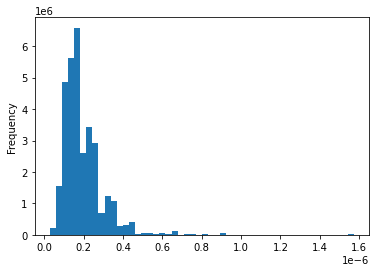

In [88]:
new_data_wo_missing_vals['inc']=new_data_wo_missing_vals['inc'].astype(object)
new_data_wo_missing_vals['inc'] = new_data_wo_missing_vals['inc']/10000 
print(new_data_wo_missing_vals['inc'].value_counts(bins=50,sort=False))
new_data_wo_missing_vals['inc'].plot(kind='hist',bins=50,density=True)

In [89]:
new_data_wo_missing_vals = get_category(new_data_wo_missing_vals,'inc', 3, ["low","medium", "high"], qcut = True)
iv, data = calc_iv(new_data_wo_missing_vals,'gp_inc','target')
ivtable.loc[ivtable['variable']=='inc','IV']=iv
data.head()

lst for gp_inc is: [['gp_inc', 'low', 8996, 8849, 147], ['gp_inc', 'high', 8244, 8096, 148], ['gp_inc', 'medium', 7894, 7767, 127]]
This variable's IV is: 0.0024219962221596752
low       8996
high      8244
medium    7894
Name: gp_inc, dtype: int64


,Variable,Value,All,Good,Bad,Share,Bad Rate,Distribution Good,Distribution Bad,WoE,IV
0,gp_inc,high,8244,8096,148,0.328002,0.017952,0.327614,0.350711,-0.068126,0.001573
1,gp_inc,low,8996,8849,147,0.357922,0.016341,0.358085,0.348341,0.027588,0.000269
2,gp_inc,medium,7894,7767,127,0.314077,0.016088,0.314301,0.300948,0.043413,0.000580


In [90]:
new_data_wo_missing_vals = convert_dummy(new_data_wo_missing_vals,'gp_inc')

In [91]:
new_data_wo_missing_vals.head(2)

,ID,Gender,Car,Reality,inc,inctp,edutp,famtp,houtp,DAYS_BIRTH,...,email,occyp,famsize,begin_month,dep_value,target,ChldNo_1,ChldNo_2More,gp_inc_high,gp_inc_medium
2,5008806,1,1,1,1.125e-07,Working,Secondary / secondary special,Married,House / apartment,-21474,...,0,Security staff,2.0,-29.0,No,0,0,0,0,0
3,5008808,0,0,1,2.7e-07,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,...,1,Sales staff,1.0,-4.0,No,0,0,0,1,0


### 10. Age Bucketing

(19.951999999999998, 24.7]    0.025066
(24.7, 29.4]                  0.134280
(29.4, 34.1]                  0.169770
(34.1, 38.8]                  0.140805
(38.8, 43.5]                  0.173072
(43.5, 48.2]                  0.141880
(48.2, 52.9]                  0.099069
(52.9, 57.6]                  0.076550
(57.6, 62.3]                  0.032585
(62.3, 67.0]                  0.006923
Name: Age, dtype: float64


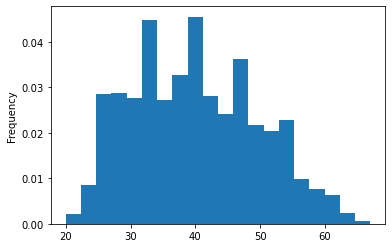

In [92]:
new_data_wo_missing_vals['Age']=-(new_data_wo_missing_vals['DAYS_BIRTH'])//365	
print(new_data_wo_missing_vals['Age'].value_counts(bins=10,normalize=True,sort=False))
new_data_wo_missing_vals['Age'].plot(kind='hist',bins=20,density=True)

In [93]:
new_data_wo_missing_vals = get_category(new_data_wo_missing_vals,'Age',5, ["lowest","low","medium","high","highest"])
iv, data = calc_iv(new_data_wo_missing_vals,'gp_Age','target')
ivtable.loc[ivtable['variable']=='DAYS_BIRTH','IV'] = iv
data.head()

lst for gp_Age is: [['gp_Age', 'highest', 993, 989, 4], ['gp_Age', 'high', 4414, 4323, 91], ['gp_Age', 'medium', 7916, 7793, 123], ['gp_Age', 'lowest', 4005, 3921, 84], ['gp_Age', 'low', 7806, 7686, 120]]
This variable's IV is: 0.06593513858884348
medium     7916
low        7806
high       4414
lowest     4005
highest     993
Name: gp_Age, dtype: int64


,Variable,Value,All,Good,Bad,Share,Bad Rate,Distribution Good,Distribution Bad,WoE,IV
0,gp_Age,high,4414,4323,91,0.175619,0.020616,0.174935,0.215640,-0.209194,0.008515
1,gp_Age,highest,993,989,4,0.039508,0.004028,0.040021,0.009479,1.440361,0.043992
2,gp_Age,low,7806,7686,120,0.310575,0.015373,0.311023,0.284360,0.089625,0.002390
3,gp_Age,lowest,4005,3921,84,0.159346,0.020974,0.158668,0.199052,-0.226754,0.009157
4,gp_Age,medium,7916,7793,123,0.314952,0.015538,0.315353,0.291469,0.078758,0.001881


In [94]:
new_data_wo_missing_vals = convert_dummy(new_data_wo_missing_vals,'gp_Age')

In [95]:
new_data_wo_missing_vals.head(2)

,ID,Gender,Car,Reality,inc,inctp,edutp,famtp,houtp,DAYS_BIRTH,...,target,ChldNo_1,ChldNo_2More,gp_inc_high,gp_inc_medium,Age,gp_Age_high,gp_Age_highest,gp_Age_low,gp_Age_lowest
2,5008806,1,1,1,1.125e-07,Working,Secondary / secondary special,Married,House / apartment,-21474,...,0,0,0,0,0,58,0,1,0,0
3,5008808,0,0,1,2.7e-07,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,...,0,0,0,1,0,52,1,0,0,0


### 11. Working years
    - Equal bucketing

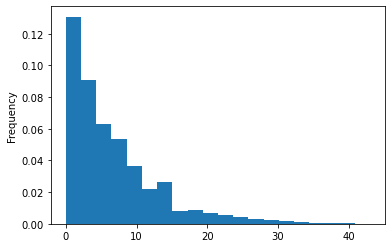

In [96]:
new_data_wo_missing_vals['worktm']=-(new_data_wo_missing_vals['DAYS_EMPLOYED'])//365	
new_data_wo_missing_vals[new_data_wo_missing_vals['worktm']<0] = np.nan # replace by na
new_data_wo_missing_vals['DAYS_EMPLOYED']
new_data_wo_missing_vals['worktm'].fillna(new_data_wo_missing_vals['worktm'].mean(),inplace=True) #replace na by mean
new_data_wo_missing_vals['worktm'].plot(kind='hist',bins=20,density=True)

In [97]:
new_data_wo_missing_vals = get_category(new_data_wo_missing_vals,'worktm',5, ["lowest","low","medium","high","highest"])
iv, data=calc_iv(new_data_wo_missing_vals,'gp_worktm','target')
ivtable.loc[ivtable['variable']=='DAYS_EMPLOYED','IV']=iv
data.head()

lst for gp_worktm is: [['gp_worktm', 'lowest', 18254, 17916, 338], ['gp_worktm', 'low', 4987, 4921, 66], ['gp_worktm', 'medium', 1378, 1362, 16], ['gp_worktm', 'high', 425, 423, 2], ['gp_worktm', 'highest', 90, 90, 0]]
This variable's IV is: 0.04022152230816303
lowest     18254
low         4987
medium      1378
high         425
highest       90
Name: gp_worktm, dtype: int64


,Variable,Value,All,Good,Bad,Share,Bad Rate,Distribution Good,Distribution Bad,WoE,IV
0,gp_worktm,high,425,423,2,0.016909,0.004706,0.017117,0.004739,1.284186,0.015895
1,gp_worktm,highest,90,90,0,0.003581,0.000000,0.003642,0.000000,0.000000,0.000000
2,gp_worktm,low,4987,4921,66,0.198416,0.013234,0.199134,0.156398,0.241573,0.010324
3,gp_worktm,lowest,18254,17916,338,0.726267,0.018516,0.724992,0.800948,-0.099635,0.007568
4,gp_worktm,medium,1378,1362,16,0.054826,0.011611,0.055115,0.037915,0.374082,0.006434


In [98]:
new_data_wo_missing_vals = convert_dummy(new_data_wo_missing_vals, 'gp_worktm')

### 12. Family Size

In [100]:
new_data_wo_missing_vals['famsize']=new_data_wo_missing_vals['famsize'].astype(int)
new_data_wo_missing_vals['famsizegp']=new_data_wo_missing_vals['famsize']
new_data_wo_missing_vals['famsizegp']=new_data_wo_missing_vals['famsizegp'].astype(object)
new_data_wo_missing_vals.loc[new_data_wo_missing_vals['famsizegp']>=3,'famsizegp']='3more'
iv, data=calc_iv(new_data_wo_missing_vals,'famsizegp','target')
ivtable.loc[ivtable['variable']=='famsize','IV']=iv
data.head()

lst for famsizegp is: [['famsizegp', 2, 12697, 12489, 208], ['famsizegp', 1, 4263, 4179, 84], ['famsizegp', '3more', 8174, 8044, 130]]
This variable's IV is: 0.006156138510778323
2        12697
3more     8174
1         4263
Name: famsizegp, dtype: int64


,Variable,Value,All,Good,Bad,Share,Bad Rate,Distribution Good,Distribution Bad,WoE,IV
0,famsizegp,1,4263,4179,84,0.169611,0.019704,0.169108,0.199052,-0.163028,0.004882
1,famsizegp,2,12697,12489,208,0.505172,0.016382,0.505382,0.492891,0.025027,0.000313
2,famsizegp,3more,8174,8044,130,0.325217,0.015904,0.325510,0.308057,0.055108,0.000962


In [101]:
new_data_wo_missing_vals = convert_dummy(new_data_wo_missing_vals,'famsizegp')

## Categorical Features
### 13. Inctp



In [102]:
print(new_data_wo_missing_vals['inctp'].value_counts(sort=False))
print(new_data_wo_missing_vals['inctp'].value_counts(normalize=True,sort=False))
new_data_wo_missing_vals.loc[new_data_wo_missing_vals['inctp']=='Pensioner','inctp']='State servant'
new_data_wo_missing_vals.loc[new_data_wo_missing_vals['inctp']=='Student','inctp']='State servant'
iv, data=calc_iv(new_data_wo_missing_vals,'inctp','target')
ivtable.loc[ivtable['variable']=='inctp','IV']=iv
data.head()

Student                    10
State servant            2437
Pensioner                  13
Working                 15622
Commercial associate     7052
Name: inctp, dtype: int64
Student                 0.000398
State servant           0.096960
Pensioner               0.000517
Working                 0.621549
Commercial associate    0.280576
Name: inctp, dtype: float64
lst for inctp is: [['inctp', 'Working', 15622, 15361, 261], ['inctp', 'Commercial associate', 7052, 6933, 119], ['inctp', 'State servant', 2460, 2418, 42]]
This variable's IV is: 5.159303327851404e-05
Working                 15622
Commercial associate     7052
State servant            2460
Name: inctp, dtype: int64


,Variable,Value,All,Good,Bad,Share,Bad Rate,Distribution Good,Distribution Bad,WoE,IV
0,inctp,Commercial associate,7052,6933,119,0.280576,0.016875,0.280552,0.281991,-0.005115,0.000007
1,inctp,State servant,2460,2418,42,0.097875,0.017073,0.097847,0.099526,-0.017013,0.000029
2,inctp,Working,15622,15361,261,0.621549,0.016707,0.621601,0.618483,0.005028,0.000016


In [103]:
new_data_wo_missing_vals = convert_dummy(new_data_wo_missing_vals,'inctp')

In [104]:
new_data_wo_missing_vals.head(2)

,ID,Gender,Car,Reality,inc,edutp,famtp,houtp,DAYS_BIRTH,DAYS_EMPLOYED,...,gp_Age_lowest,worktm,gp_worktm_high,gp_worktm_highest,gp_worktm_low,gp_worktm_medium,famsizegp_1,famsizegp_3more,inctp_Commercial associate,inctp_State servant
2,5008806.0,1.0,1.0,1.0,1.125e-07,Secondary / secondary special,Married,House / apartment,-21474.0,-1134.0,...,0.0,3.0,0,0,0,0,0,0,0,0
3,5008808.0,0.0,0.0,1.0,2.7e-07,Secondary / secondary special,Single / not married,House / apartment,-19110.0,-3051.0,...,0.0,8.0,0,0,0,0,1,0,1,0


### 14. Occuptation Type

In [106]:
new_data = new_data_wo_missing_vals
new_data.loc[(new_data['occyp']=='Cleaning staff') | (new_data['occyp']=='Cooking staff') | (new_data['occyp']=='Drivers') | (new_data['occyp']=='Laborers') | (new_data['occyp']=='Low-skill Laborers') | (new_data['occyp']=='Security staff') | (new_data['occyp']=='Waiters/barmen staff'),'occyp']='Laborwk'
new_data.loc[(new_data['occyp']=='Accountants') | (new_data['occyp']=='Core staff') | (new_data['occyp']=='HR staff') | (new_data['occyp']=='Medicine staff') | (new_data['occyp']=='Private service staff') | (new_data['occyp']=='Realty agents') | (new_data['occyp']=='Sales staff') | (new_data['occyp']=='Secretaries'),'occyp']='officewk'
new_data.loc[(new_data['occyp']=='Managers') | (new_data['occyp']=='High skill tech staff') | (new_data['occyp']=='IT staff'),'occyp']='hightecwk'
print(new_data['occyp'].value_counts())
iv, data=calc_iv(new_data,'occyp','target')
ivtable.loc[ivtable['variable']=='occyp','IV']=iv
data.head()  

Laborwk      10496
officewk     10183
hightecwk     4455
Name: occyp, dtype: int64
lst for occyp is: [['occyp', 'Laborwk', 10496, 10311, 185], ['occyp', 'officewk', 10183, 10026, 157], ['occyp', 'hightecwk', 4455, 4375, 80]]
This variable's IV is: 0.004820472062853304
Laborwk      10496
officewk     10183
hightecwk     4455
Name: occyp, dtype: int64


,Variable,Value,All,Good,Bad,Share,Bad Rate,Distribution Good,Distribution Bad,WoE,IV
0,occyp,Laborwk,10496,10311,185,0.417602,0.017626,0.417247,0.438389,-0.049428,0.001045
1,occyp,hightecwk,4455,4375,80,0.177250,0.017957,0.177039,0.189573,-0.068404,0.000857
2,occyp,officewk,10183,10026,157,0.405148,0.015418,0.405714,0.372038,0.086652,0.002918


In [107]:
new_data = convert_dummy(new_data,'occyp')

In [108]:
new_data.head(2
             )

,ID,Gender,Car,Reality,inc,edutp,famtp,houtp,DAYS_BIRTH,DAYS_EMPLOYED,...,gp_worktm_high,gp_worktm_highest,gp_worktm_low,gp_worktm_medium,famsizegp_1,famsizegp_3more,inctp_Commercial associate,inctp_State servant,occyp_hightecwk,occyp_officewk
2,5008806.0,1.0,1.0,1.0,1.125e-07,Secondary / secondary special,Married,House / apartment,-21474.0,-1134.0,...,0,0,0,0,0,0,0,0,0,0
3,5008808.0,0.0,0.0,1.0,2.7e-07,Secondary / secondary special,Single / not married,House / apartment,-19110.0,-3051.0,...,0,0,0,0,1,0,1,0,0,1


### 15. House

In [109]:
iv, data=calc_iv(new_data,'houtp','target')
ivtable.loc[ivtable['variable']=='houtp','IV']=iv
data.head()

lst for houtp is: [['houtp', 'House / apartment', 22102, 21738, 364], ['houtp', 'Rented apartment', 439, 433, 6], ['houtp', 'Municipal apartment', 812, 793, 19], ['houtp', 'With parents', 1430, 1405, 25], ['houtp', 'Co-op apartment', 152, 149, 3], ['houtp', 'Office apartment', 199, 194, 5]]
This variable's IV is: 0.0073275026880227365
House / apartment      22102
With parents            1430
Municipal apartment      812
Rented apartment         439
Office apartment         199
Co-op apartment          152
Name: houtp, dtype: int64


,Variable,Value,All,Good,Bad,Share,Bad Rate,Distribution Good,Distribution Bad,WoE,IV
0,houtp,Co-op apartment,152,149,3,0.006048,0.019737,0.006029,0.007109,-0.164705,0.000178
1,houtp,House / apartment,22102,21738,364,0.879367,0.016469,0.879654,0.862559,0.019624,0.000335
2,houtp,Municipal apartment,812,793,19,0.032307,0.023399,0.032090,0.045024,-0.338655,0.004380
3,houtp,Office apartment,199,194,5,0.007918,0.025126,0.007850,0.011848,-0.411619,0.001646
4,houtp,Rented apartment,439,433,6,0.017466,0.013667,0.017522,0.014218,0.208939,0.000690


In [110]:
new_data = convert_dummy(new_data,'houtp')

### 16. Education

In [111]:
new_data.loc[new_data['edutp']=='Academic degree','edutp']='Higher education'
iv, data=calc_iv(new_data,'edutp','target')
ivtable.loc[ivtable['variable']=='edutp','IV']=iv
data.head()


lst for edutp is: [['edutp', 'Secondary / secondary special', 16808, 16541, 267], ['edutp', 'Higher education', 7146, 7018, 128], ['edutp', 'Incomplete higher', 993, 972, 21], ['edutp', 'Lower secondary', 187, 181, 6]]
This variable's IV is: 0.010361794017679489
Secondary / secondary special    16808
Higher education                  7146
Incomplete higher                  993
Lower secondary                    187
Name: edutp, dtype: int64


,Variable,Value,All,Good,Bad,Share,Bad Rate,Distribution Good,Distribution Bad,WoE,IV
0,edutp,Higher education,7146,7018,128,0.284316,0.017912,0.283992,0.303318,-0.065836,0.001272
1,edutp,Incomplete higher,993,972,21,0.039508,0.021148,0.039333,0.049763,-0.235206,0.002453
2,edutp,Lower secondary,187,181,6,0.007440,0.032086,0.007324,0.014218,-0.663301,0.004573
3,edutp,Secondary / secondary special,16808,16541,267,0.668736,0.015885,0.669351,0.632701,0.056310,0.002064


In [112]:
new_data = convert_dummy(new_data,'edutp')

In [113]:
iv, data=calc_iv(new_data,'famtp','target')
ivtable.loc[ivtable['variable']=='famtp','IV']=iv
data.head()

lst for famtp is: [['famtp', 'Married', 17509, 17232, 277], ['famtp', 'Single / not married', 3445, 3362, 83], ['famtp', 'Civil marriage', 2133, 2101, 32], ['famtp', 'Separated', 1467, 1452, 15], ['famtp', 'Widow', 580, 565, 15]]
This variable's IV is: 0.043137115423127946
Married                 17509
Single / not married     3445
Civil marriage           2133
Separated                1467
Widow                     580
Name: famtp, dtype: int64


,Variable,Value,All,Good,Bad,Share,Bad Rate,Distribution Good,Distribution Bad,WoE,IV
0,famtp,Civil marriage,2133,2101,32,0.084865,0.015002,0.085019,0.075829,0.114394,0.001051
1,famtp,Married,17509,17232,277,0.696626,0.015820,0.697313,0.656398,0.060467,0.002474
2,famtp,Separated,1467,1452,15,0.058367,0.010225,0.058757,0.035545,0.502608,0.011666
3,famtp,Single / not married,3445,3362,83,0.137065,0.024093,0.136047,0.196682,-0.368588,0.022349
4,famtp,Widow,580,565,15,0.023076,0.025862,0.022863,0.035545,-0.441263,0.005596


In [114]:
new_data = convert_dummy(new_data,'famtp')

In [115]:
ivtable=ivtable.sort_values(by='IV',ascending=False)
ivtable.loc[ivtable['variable']=='DAYS_BIRTH','variable']='agegp'
ivtable.loc[ivtable['variable']=='DAYS_EMPLOYED','variable']='worktmgp'
ivtable.loc[ivtable['variable']=='inc','variable']='incgp'
ivtable



,variable,IV
10,agegp,0.0659351
8,famtp,0.0431371
11,worktmgp,0.0402215
3,Reality,0.0274407
1,Gender,0.0252035
7,edutp,0.0103618
9,houtp,0.0073275
17,famsize,0.00615614
16,occyp,0.00482047
5,incgp,0.002422


# Step 4: Modeling

In [117]:
new_data.columns

Index(['ID', 'Gender', 'Car', 'Reality', 'inc', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'FLAG_MOBIL', 'wkphone', 'phone', 'email', 'famsize', 'begin_month',
       'dep_value', 'target', 'ChldNo_1', 'ChldNo_2More', 'gp_inc_high',
       'gp_inc_medium', 'Age', 'gp_Age_high', 'gp_Age_highest', 'gp_Age_low',
       'gp_Age_lowest', 'worktm', 'gp_worktm_high', 'gp_worktm_highest',
       'gp_worktm_low', 'gp_worktm_medium', 'famsizegp_1', 'famsizegp_3more',
       'inctp_Commercial associate', 'inctp_State servant', 'occyp_hightecwk',
       'occyp_officewk', 'houtp_Co-op apartment', 'houtp_Municipal apartment',
       'houtp_Office apartment', 'houtp_Rented apartment',
       'houtp_With parents', 'edutp_Higher education',
       'edutp_Incomplete higher', 'edutp_Lower secondary',
       'famtp_Civil marriage', 'famtp_Separated', 'famtp_Single / not married',
       'famtp_Widow'],
      dtype='object')

In [118]:
Y = new_data['target']
X = new_data[['Gender','Reality','ChldNo_1', 'ChldNo_2More','wkphone',
              'gp_Age_high', 'gp_Age_highest', 'gp_Age_low',
       'gp_Age_lowest','gp_worktm_high', 'gp_worktm_highest',
       'gp_worktm_low', 'gp_worktm_medium','occyp_hightecwk', 
              'occyp_officewk','famsizegp_1', 'famsizegp_3more',
       'houtp_Co-op apartment', 'houtp_Municipal apartment',
       'houtp_Office apartment', 'houtp_Rented apartment',
       'houtp_With parents','edutp_Higher education',
       'edutp_Incomplete higher', 'edutp_Lower secondary','famtp_Civil marriage',
       'famtp_Separated','famtp_Single / not married','famtp_Widow']]

### Using Synthetic Minority Over-Sampling Technique(SMOTE) to overcome sample imbalance problem.

In [119]:
from imblearn.over_sampling import SMOTE
Y = Y.astype('int')
X_balance,Y_balance = SMOTE().fit_sample(X,Y)
X_balance = pd.DataFrame(X_balance, columns = X.columns)

In [120]:
X_balance, Y_balance

(       Gender  Reality  ChldNo_1  ChldNo_2More wkphone  gp_Age_high  \
 0         1.0      1.0       0.0           0.0       0          0.0   
 1         0.0      1.0       0.0           0.0       0          1.0   
 2         0.0      1.0       0.0           0.0       0          1.0   
 3         0.0      1.0       0.0           0.0       0          1.0   
 4         0.0      1.0       0.0           0.0       0          1.0   
 ...       ...      ...       ...           ...     ...          ...   
 49419     1.0      1.0       0.0           0.0       0          0.0   
 49420     0.0      0.0       1.0           0.0       1          0.0   
 49421     1.0      1.0       0.0           0.0       0          0.0   
 49422     1.0      1.0       0.0           0.0       0          0.0   
 49423     0.0      0.0       0.0           0.0       1          1.0   
 
        gp_Age_highest  gp_Age_low  gp_Age_lowest  gp_worktm_high  ...  \
 0                 1.0         0.0            0.0           

In [121]:
X,Y

(       Gender  Reality  ChldNo_1  ChldNo_2More wkphone  gp_Age_high  \
 2         1.0      1.0       0.0           0.0       0          0.0   
 3         0.0      1.0       0.0           0.0       0          1.0   
 4         0.0      1.0       0.0           0.0       0          1.0   
 5         0.0      1.0       0.0           0.0       0          1.0   
 6         0.0      1.0       0.0           0.0       0          1.0   
 ...       ...      ...       ...           ...     ...          ...   
 36452     1.0      1.0       0.0           0.0       0          0.0   
 36453     0.0      1.0       0.0           0.0       0          0.0   
 36454     0.0      1.0       0.0           0.0       0          0.0   
 36455     0.0      1.0       0.0           0.0       0          1.0   
 36456     1.0      1.0       0.0           0.0       0          0.0   
 
        gp_Age_highest  gp_Age_low  gp_Age_lowest  gp_worktm_high  ...  \
 2                 1.0         0.0            0.0           

In [122]:
Y_balance.value_counts()

1    24712
0    24712
Name: target, dtype: int64

### Split the data into Training and Testing set

In [124]:
# Import Sklearn libraries as well as classifiers
import itertools

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier

X_train, X_test, y_train, y_test = train_test_split(X_balance,Y_balance, 
                                                    stratify=Y_balance, test_size=0.3,
                                                    random_state = 10086)


## Model 1: Logistic Regression

In [126]:
import seaborn as sns

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Accuracy Score is 0.64189
      0     1
0  4225  3189
1  2121  5293
[1. 1.]
[[1.]
 [1.]]


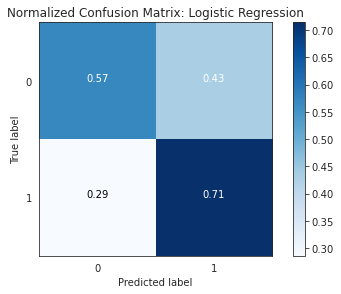

In [127]:
model = LogisticRegression(C=0.8,
                           random_state=0,
                           solver='lbfgs')
model.fit(X_train, y_train)
y_predict = model.predict(X_test)

print('Accuracy Score is {:.5}'.format(accuracy_score(y_test, y_predict)))
print(pd.DataFrame(confusion_matrix(y_test,y_predict)))

sns.set_style('white') 
class_names = ['0','1']
plot_confusion_matrix(confusion_matrix(y_test,y_predict),
                      classes= class_names, normalize = True, 
                      title='Normalized Confusion Matrix: Logistic Regression')

## Model 2: Decision Trees

Accuracy Score is 0.79721
      0     1
0  5844  1570
1  1437  5977
[1. 1.]
[[1.]
 [1.]]


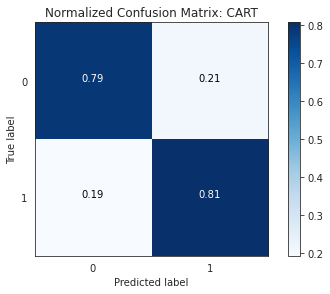

In [128]:
model = DecisionTreeClassifier(max_depth=12,
                               min_samples_split=8,
                               random_state=1024)
model.fit(X_train, y_train)
y_predict = model.predict(X_test)

print('Accuracy Score is {:.5}'.format(accuracy_score(y_test, y_predict)))
print(pd.DataFrame(confusion_matrix(y_test,y_predict)))

plot_confusion_matrix(confusion_matrix(y_test,y_predict),
                      classes=class_names, normalize = True, 
                      title='Normalized Confusion Matrix: CART')

## Model 3: Random Forest

Accuracy Score is 0.8345
      0     1
0  5965  1449
1  1005  6409
[1. 1.]
[[1.]
 [1.]]


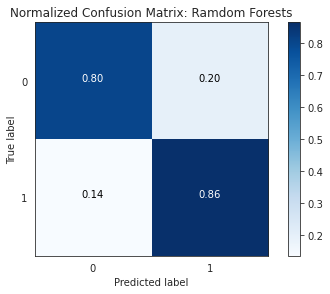

In [129]:
model = RandomForestClassifier(n_estimators=250,
                              max_depth=12,
                              min_samples_leaf=16
                              )
model.fit(X_train, y_train)
y_predict = model.predict(X_test)

print('Accuracy Score is {:.5}'.format(accuracy_score(y_test, y_predict)))
print(pd.DataFrame(confusion_matrix(y_test,y_predict)))

plot_confusion_matrix(confusion_matrix(y_test,y_predict),
                      classes=class_names, normalize = True, 
                      title='Normalized Confusion Matrix: Ramdom Forests')

## Model 4: SVM

Accuracy Score is 0.86262
      0     1
0  6080  1334
1   703  6711
[1. 1.]
[[1.]
 [1.]]


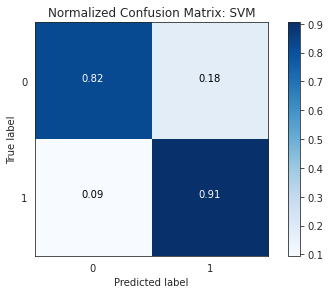

In [132]:
model = svm.SVC(C = 0.8,
                kernel='rbf')
model.fit(X_train, y_train)
y_predict = model.predict(X_test)

print('Accuracy Score is {:.5}'.format(accuracy_score(y_test, y_predict)))
print(pd.DataFrame(confusion_matrix(y_test,y_predict)))

plot_confusion_matrix(confusion_matrix(y_test,y_predict),
                      classes=class_names, normalize = True, 
                      title='Normalized Confusion Matrix: SVM')

## Model 5: LGBM

In [137]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34596 entries, 32515 to 2664
Data columns (total 29 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Gender                      34596 non-null  float64
 1   Reality                     34596 non-null  float64
 2   ChldNo_1                    34596 non-null  float64
 3   ChldNo_2More                34596 non-null  float64
 4   wkphone                     34596 non-null  float64
 5   gp_Age_high                 34596 non-null  float64
 6   gp_Age_highest              34596 non-null  float64
 7   gp_Age_low                  34596 non-null  float64
 8   gp_Age_lowest               34596 non-null  float64
 9   gp_worktm_high              34596 non-null  uint8  
 10  gp_worktm_highest           34596 non-null  uint8  
 11  gp_worktm_low               34596 non-null  uint8  
 12  gp_worktm_medium            34596 non-null  uint8  
 13  occyp_hightecwk             

In [135]:
X_train['wkphone']=X_train['wkphone'].astype('float64')

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [140]:
model = LGBMClassifier(num_leaves=31,
                       max_depth=8, 
                       learning_rate=0.02,
                       n_estimators=250,
                       subsample = 0.8,
                       colsample_bytree =0.8
                      )

X_test['wkphone']=X_test['wkphone'].astype('float64')
model.fit(X_train, y_train)
y_predict = model.predict(X_test)
print('Accuracy Score is {:.5}'.format(accuracy_score(y_test, y_predict)))
print(pd.DataFrame(confusion_matrix(y_test,y_predict)))

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


Accuracy Score is 0.84576
      0     1
0  6188  1226
1  1061  6353


In [141]:
X_train.wkphone

32515    0.0
14471    0.0
16400    1.0
29956    1.0
39904    0.0
        ... 
38963    0.0
19666    1.0
3278     0.0
22944    0.0
2664     0.0
Name: wkphone, Length: 34596, dtype: float64

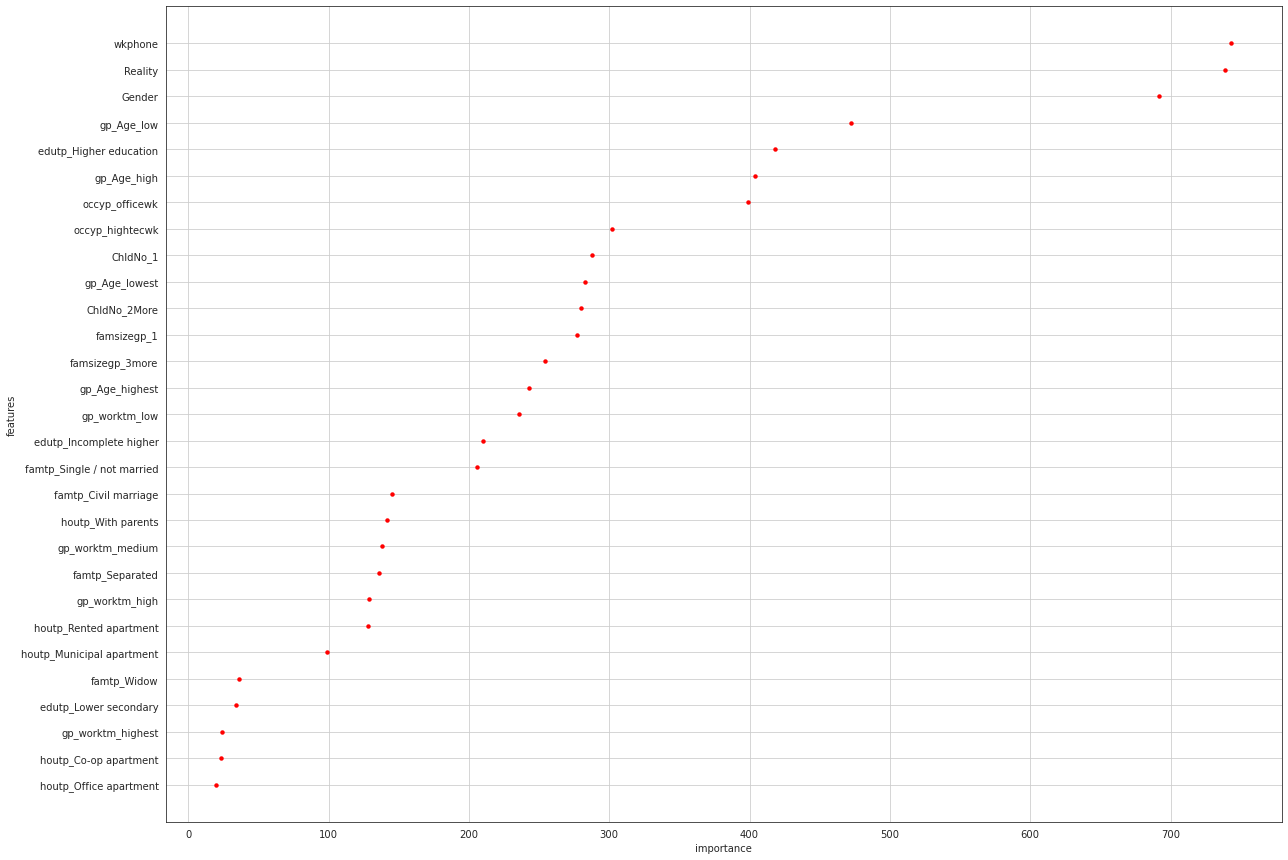

In [148]:
def plot_importance(classifer, x_train, point_size = 55):
    '''plot feature importance'''
    fig= plt.figure(figsize=(20,15))
    values = sorted(zip(x_train.columns, classifer.feature_importances_), key = lambda x: x[1] * -1)
    imp = pd.DataFrame(values,columns = ["Name", "Score"])
    imp.sort_values(by = 'Score',inplace = True)
    sns.scatterplot(x = 'Score',y='Name', linewidth = 0,
                data = imp,s = point_size, color='red').set(
    xlabel='importance', 
    ylabel='features')
    plt.grid(True)

    
plot_importance(model, X_train,20)  

In [149]:
model.booster_.feature_importance(importance_type='gain')

array([41918.14286233, 89908.02784972, 19505.1337961 , 16315.06784064,
       71356.64770692, 30883.25611138, 23969.91427201, 40459.32066977,
       22115.8343505 ,  7609.14086109,   292.1202597 , 24350.61168934,
       15522.06268167, 13343.82638748, 20301.8885306 , 12252.94385424,
       16163.03940484,   783.60359859,  4079.20045641,   297.38511944,
        8656.17451096,  9324.84864521, 19407.46775034, 12127.19591152,
         890.03973293, 12865.54024744, 11213.70597586,  8210.01613265,
        1174.08023179])

## Model 6: XGBoost

In [150]:
model = XGBClassifier(max_depth=12,
                      n_estimators=250,
                      min_child_weight=8, 
                      subsample=0.8, 
                      learning_rate =0.02,    
                      seed=42)

model.fit(X_train, y_train)
y_predict = model.predict(X_test)
print('Accuracy Score is {:.5}'.format(accuracy_score(y_test, y_predict)))
print(pd.DataFrame(confusion_matrix(y_test,y_predict)))

Accuracy Score is 0.88414
      0     1
0  6377  1037
1   681  6733


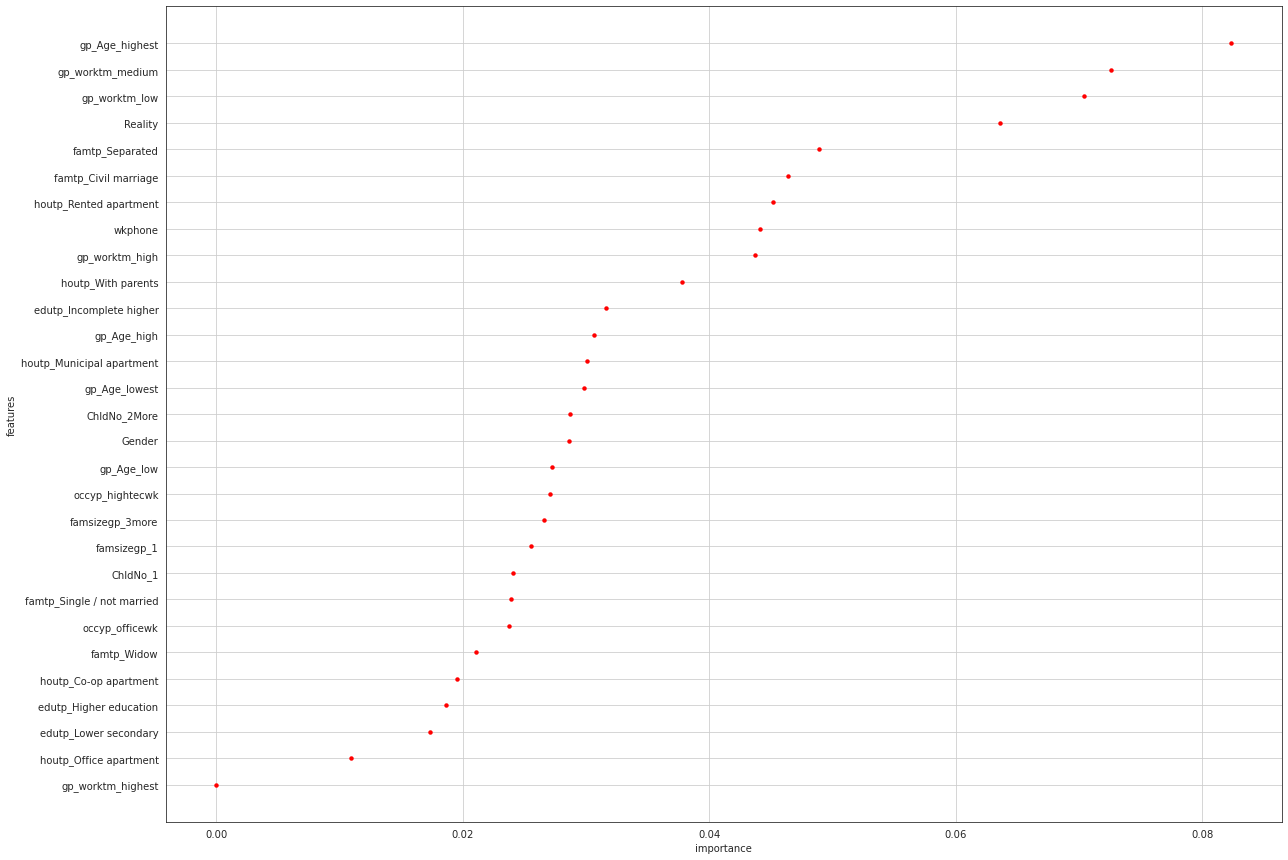

In [151]:
plot_importance(model, X_train, 20)  

## Model 7: CatBoost 

In [ ]:
model = CatBoostClassifier(iterations=250,
                           learning_rate=0.2,
                           od_type='Iter',
                           verbose=25,
                           depth=16,
                           random_seed=42)

model.fit(X_train, y_train)
y_predict = model.predict(X_test)
print('CatBoost Accuracy Score is {:.5}'.format(accuracy_score(y_test, y_predict)))
print(pd.DataFrame(confusion_matrix(y_test,y_predict)))

0:	learn: 0.5376559	total: 5.44s	remaining: 22m 34s
25:	learn: 0.2210276	total: 1m 30s	remaining: 13m 2s
